#未norm的合并hvg2000sc,hvg2000st的common genes的数据
/s/f/shiyi/ST/hierarchy_dense_net/test1029/mynetwork/mynetwork_scstmerge_deconvolution/MY_RCTD/MYDATA/under_sample/st_subsetRCTD/sc_combine.h5ad   
/s/f/shiyi/ST/hierarchy_dense_net/test1029/mynetwork/mynetwork_scstmerge_deconvolution/MY_RCTD/MYDATA/under_sample/st_subsetRCTD/st_combine.h5ad    
#rctd后单一细胞类型的spots:
/s/f/shiyi/ST/hierarchy_dense_net/test1029/mynetwork/mynetwork_scstmerge_deconvolution/MY_RCTD/MYDATA/under_sample/st_subsetRCTD/st_combine_subset.h5ad


In [1]:
import os              
os.environ['PYTHONHASHSEED'] = '0'
import desc          
import pandas as pd                                                    
import numpy as np                                                     
import scanpy as sc                                                                                 
from time import time                                                       
import sys
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
sc.settings.set_figure_params(dpi=300)
print(sys.version)
sc.logging.print_versions()
desc.__version__
import tensorflow as tf
tf.__version__

3.6.13 | packaged by conda-forge | (default, Sep 23 2021, 07:56:31) 
[GCC 9.4.0]
The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
2f7ece400a652629565c523b34ee61b04afa385c    NA
PIL                                         8.3.2
absl                                        NA
astunparse                                  1.6.3
cached_property                             1.5.2
certifi                                     2021.05.30
cffi                                        1.14.6
charset_normalizer

'2.6.0'

In [2]:
sc_combine=sc.read_h5ad("/s/f/shiyi/ST/hierarchy_dense_net/test1029/mynetwork/mynetwork_scstmerge_deconvolution/MY_RCTD/MYDATA/under_sample/st_subsetRCTD/sc_combine.h5ad")
sc_combine

AnnData object with n_obs × n_vars = 40532 × 3348
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: 'features'

In [3]:
print(sc_combine.X)

  (0, 9)	9.0
  (0, 19)	1.0
  (0, 28)	1.0
  (0, 32)	3.0
  (0, 33)	1.0
  (0, 37)	1.0
  (0, 38)	1.0
  (0, 39)	16.0
  (0, 44)	1.0
  (0, 46)	1.0
  (0, 48)	6.0
  (0, 49)	1.0
  (0, 50)	45.0
  (0, 53)	1.0
  (0, 55)	4.0
  (0, 57)	1.0
  (0, 63)	1.0
  (0, 79)	5.0
  (0, 80)	8.0
  (0, 83)	1.0
  (0, 84)	3.0
  (0, 86)	1.0
  (0, 94)	1.0
  (0, 100)	2.0
  (0, 106)	2.0
  :	:
  (40531, 3216)	1.0
  (40531, 3217)	1.0
  (40531, 3226)	17.0
  (40531, 3227)	1.0
  (40531, 3233)	1.0
  (40531, 3238)	1.0
  (40531, 3242)	1.0
  (40531, 3243)	3.0
  (40531, 3247)	3.0
  (40531, 3250)	1.0
  (40531, 3253)	1.0
  (40531, 3260)	1.0
  (40531, 3262)	3.0
  (40531, 3270)	3.0
  (40531, 3273)	10.0
  (40531, 3285)	2.0
  (40531, 3288)	6.0
  (40531, 3319)	2.0
  (40531, 3320)	4.0
  (40531, 3327)	1.0
  (40531, 3330)	1.0
  (40531, 3334)	1.0
  (40531, 3336)	2.0
  (40531, 3342)	1.0
  (40531, 3346)	1.0


In [4]:
from scipy.io import mmwrite
mmwrite("sc_combine_counts_sparse.mtx", sc_combine.raw.X.T)#未norm的数据

In [5]:
st_combine=sc.read_h5ad("/s/f/shiyi/ST/hierarchy_dense_net/test1029/mynetwork/mynetwork_scstmerge_deconvolution/MY_RCTD/MYDATA/under_sample/st_subsetRCTD/st_combine.h5ad")
st_combine

AnnData object with n_obs × n_vars = 2987 × 3348
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial'
    var: 'features'

In [9]:
print(st_combine.X)

  (0, 1)	6.0
  (0, 2)	2.0
  (0, 8)	2.0
  (0, 14)	2.0
  (0, 15)	1.0
  (0, 17)	4.0
  (0, 21)	1.0
  (0, 25)	2.0
  (0, 26)	6.0
  (0, 27)	1.0
  (0, 36)	1.0
  (0, 41)	1.0
  (0, 60)	9.0
  (0, 72)	3.0
  (0, 73)	3.0
  (0, 74)	2.0
  (0, 77)	15.0
  (0, 79)	4.0
  (0, 88)	2.0
  (0, 90)	3.0
  (0, 94)	2.0
  (0, 98)	1.0
  (0, 99)	1.0
  (0, 100)	1.0
  (0, 101)	2.0
  :	:
  (2986, 3280)	4.0
  (2986, 3285)	6.0
  (2986, 3287)	1.0
  (2986, 3288)	3.0
  (2986, 3291)	1.0
  (2986, 3295)	6.0
  (2986, 3296)	1.0
  (2986, 3298)	1.0
  (2986, 3306)	1.0
  (2986, 3308)	1.0
  (2986, 3310)	1.0
  (2986, 3312)	1.0
  (2986, 3314)	2.0
  (2986, 3316)	2.0
  (2986, 3324)	1.0
  (2986, 3326)	51.0
  (2986, 3327)	6.0
  (2986, 3330)	3.0
  (2986, 3335)	3.0
  (2986, 3336)	3.0
  (2986, 3339)	6.0
  (2986, 3341)	2.0
  (2986, 3342)	2.0
  (2986, 3343)	8.0
  (2986, 3345)	1.0


In [11]:
desc.normalize_per_cell(sc_combine, counts_per_cell_after=1e4)
sc.pp.log1p(sc_combine)
desc.scale(sc_combine, zero_center=True, max_value=3)

In [14]:
save_dir="/s/f/shiyi/ST/hierarchy_dense_net/test1029/mynetwork/mynetwork_scstmerge_deconvolution/0727/1_mydesc/sc_desc"

adatas = desc.train(sc_combine, dims=[sc_combine.shape[1], 256, 64], tol=0.005, n_neighbors=10,
                   batch_size=256, louvain_resolution=[0.2,0.4,0.6,0.8],
                   save_dir=save_dir, do_tsne=True, learning_rate=300,
                   do_umap=True, num_Cores_tsne=4,
                   save_encoder_weights=True)

Start to process resolution= 0.2
The number of cpu in your computer is 32
Create the directory:/s/f/shiyi/ST/hierarchy_dense_net/test1029/mynetwork/mynetwork_scstmerge_deconvolution/0727/1_mydesc/sc_desc to save result
Checking whether /s/f/shiyi/ST/hierarchy_dense_net/test1029/mynetwork/mynetwork_scstmerge_deconvolution/0727/1_mydesc/sc_desc/ae_weights.h5  exists in the directory
The file ae_weights.h5 is not exits
Pretraining the 1th layer...
learning rate = 0.1
Epoch 1/50
159/159 [==============================] - 12s 72ms/step - loss: 0.7248
Epoch 2/50
159/159 [==============================] - 11s 71ms/step - loss: 0.6537
Epoch 3/50
159/159 [==============================] - 11s 72ms/step - loss: 0.6280
Epoch 4/50
159/159 [==============================] - 12s 73ms/step - loss: 0.6126
Epoch 5/50
159/159 [==============================] - 11s 71ms/step - loss: 0.6019
Epoch 6/50
159/159 [==============================] - 11s 71ms/step - loss: 0.5937
Epoch 7/50
159/159 [=============

/s/f/shiyi/miniconda3/envs/DESC/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9002. The TBB threading layer is disabled.
  warnings.warn(problem)


Fine tuning encoder weights are saved to /s/f/shiyi/ST/hierarchy_dense_net/test1029/mynetwork/mynetwork_scstmerge_deconvolution/0727/1_mydesc/sc_desc/encoder_weights.h5
The value of delta_label of current 1 th iteration is 0.029063456034737985 >= tol 0.005
Epoch 1/5
159/159 [==============================] - 6s 35ms/step - loss: 0.0696
Epoch 2/5
159/159 [==============================] - 5s 34ms/step - loss: 0.0517
Epoch 3/5
159/159 [==============================] - 5s 34ms/step - loss: 0.0400
Epoch 4/5
159/159 [==============================] - 5s 34ms/step - loss: 0.0317
Epoch 5/5
159/159 [==============================] - 6s 35ms/step - loss: 0.0263
The value of delta_label of current 2 th iteration is 0.015765321227671963 >= tol 0.005
Epoch 1/5
159/159 [==============================] - 5s 34ms/step - loss: 0.1898
Epoch 2/5
159/159 [==============================] - 5s 34ms/step - loss: 0.1300
Epoch 3/5
159/159 [==============================] - 6s 35ms/step - loss: 0.1045
Epoch 4

The desc has been trained successfully!!!!!!
The summary of desc model is:
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3348)]            0         
_________________________________________________________________
encoder_0 (Dense)            (None, 256)               857344    
_________________________________________________________________
encoder_1 (Dense)            (None, 64)                16448     
_________________________________________________________________
clustering (ClusteringLayer) (None, 30)                1920      
Total params: 875,712
Trainable params: 875,712
Non-trainable params: 0
_________________________________________________________________
The runtime of (resolution=0.2)is: 3102.874386072159
tsne finished and added X_tsne0.2  into the umap coordinates (adata.obsm)

umap finished and added X_umap0.2  into the umap

The desc has been trained successfully!!!!!!
The summary of desc model is:
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3348)]            0         
_________________________________________________________________
encoder_0 (Dense)            (None, 256)               857344    
_________________________________________________________________
encoder_1 (Dense)            (None, 64)                16448     
_________________________________________________________________
clustering (ClusteringLayer) (None, 34)                2176      
Total params: 875,968
Trainable params: 875,968
Non-trainable params: 0
_________________________________________________________________
The runtime of (resolution=0.4)is: 160.9525282382965
tsne finished and added X_tsne0.4  into the umap coordinates (adata.obsm)

umap finished and added X_umap0.4  into the umap

The desc has been trained successfully!!!!!!
The summary of desc model is:
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3348)]            0         
_________________________________________________________________
encoder_0 (Dense)            (None, 256)               857344    
_________________________________________________________________
encoder_1 (Dense)            (None, 64)                16448     
_________________________________________________________________
clustering (ClusteringLayer) (None, 36)                2304      
Total params: 876,096
Trainable params: 876,096
Non-trainable params: 0
_________________________________________________________________
The runtime of (resolution=0.6)is: 262.38981652259827
tsne finished and added X_tsne0.6  into the umap coordinates (adata.obsm)

umap finished and added X_umap0.6  into the uma

The desc has been trained successfully!!!!!!
The summary of desc model is:
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3348)]            0         
_________________________________________________________________
encoder_0 (Dense)            (None, 256)               857344    
_________________________________________________________________
encoder_1 (Dense)            (None, 64)                16448     
_________________________________________________________________
clustering (ClusteringLayer) (None, 36)                2304      
Total params: 876,096
Trainable params: 876,096
Non-trainable params: 0
_________________________________________________________________
The runtime of (resolution=0.8)is: 226.7611005306244
tsne finished and added X_tsne0.8  into the umap coordinates (adata.obsm)

umap finished and added X_umap0.8  into the umap

In [20]:
adatas.obs

,orig.ident,nCount_RNA,nFeature_RNA,n_counts,desc_0.2,desc_0.4,desc_0.6,desc_0.8
5705STDY8058283_AAACCCAAGCCTATTG-1,3,6159.0,1126,6159.0,2,2,5,5
5705STDY8058283_AAACCCAAGGTCATAA-1,3,943.0,288,943.0,0,0,0,0
5705STDY8058283_AAACCCACAACCCTCT-1,3,940.0,302,940.0,0,0,0,0
5705STDY8058283_AAACCCAGTGCTATTG-1,3,668.0,260,668.0,3,11,11,11
5705STDY8058283_AAACCCAGTTCACCGG-1,3,3111.0,825,3111.0,8,8,8,8
...,...,...,...,...,...,...,...,...
5705STDY8058280_TTTGTTGCAGAGTGAC-1,0,297.0,182,297.0,11,10,10,10
5705STDY8058280_TTTGTTGCATCGCTCT-1,0,724.0,253,724.0,0,0,0,0
5705STDY8058280_TTTGTTGGTATGGTAA-1,0,2466.0,681,2466.0,14,15,16,16
5705STDY8058280_TTTGTTGGTGTAGTGG-1,0,497.0,174,497.0,0,0,0,0


In [21]:
adatas.__dict__['_raw'].__dict__['_var'] = adatas.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})

In [22]:
adatas.write("/s/f/shiyi/ST/hierarchy_dense_net/test1029/mynetwork/mynetwork_scstmerge_deconvolution/0727/1_mydesc/sc_desc.h5ad")

In [27]:
adatas=sc.read_h5ad("/s/f/shiyi/ST/hierarchy_dense_net/test1029/mynetwork/mynetwork_scstmerge_deconvolution/0727/1_mydesc/sc_desc.h5ad")

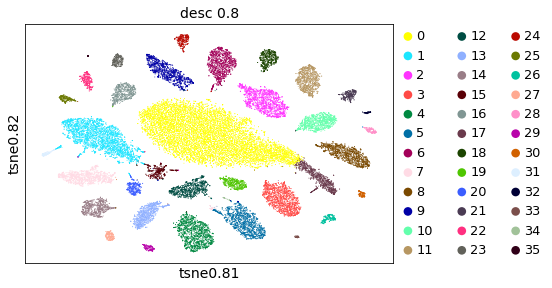

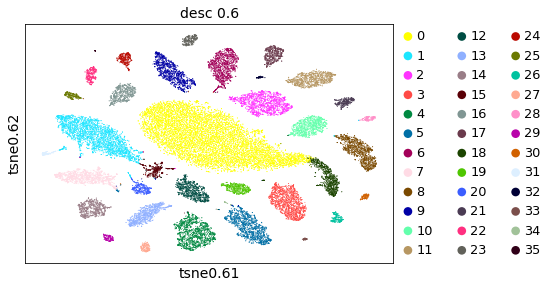

In [28]:
sc.pl.scatter(adatas,basis="tsne0.8",color=['desc_0.8'])
sc.pl.scatter(adatas,basis="tsne0.6",color=['desc_0.6'])

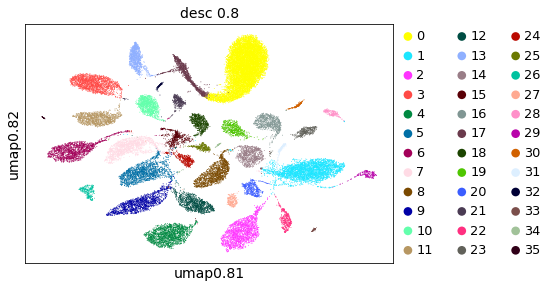

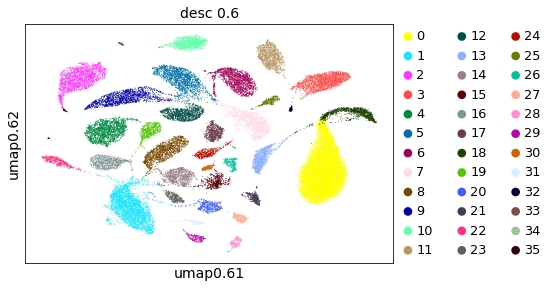

In [29]:
sc.pl.scatter(adatas,basis="umap0.8",color=['desc_0.8'])
sc.pl.scatter(adatas,basis="umap0.6",color=['desc_0.6'])

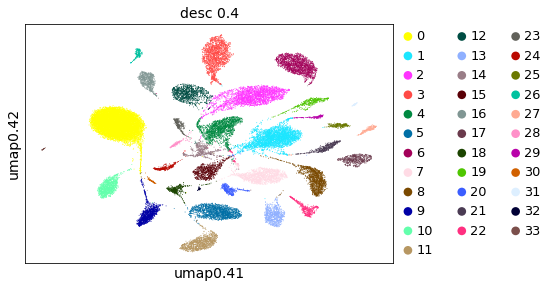

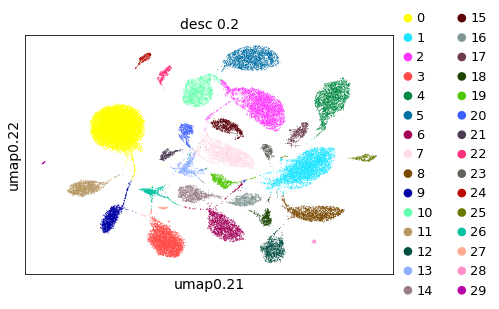

In [30]:
sc.pl.scatter(adatas,basis="umap0.4",color=['desc_0.4'])
sc.pl.scatter(adatas,basis="umap0.2",color=['desc_0.2'])

In [18]:
adatas.obs.to_csv("meta_data_anno2.csv")
adatas.write_csvs(dirname="dge_anno2.csv", skip_data=False, sep=',')

writing .csv files to dge_anno2
